In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns

In [8]:
df = pd.read_csv("C:/Users/user/Downloads/cholesterol_prediction.csv ")

In [9]:
df

,ID,Age (years),Blood Pressure (mmHg),"Smoking (Yes=1, No=0)",Cholesterol Level (mg/dL)
0,1,31,151.6,1,313.2
1,2,27,135.8,1,303.5
2,3,47,141.8,0,296.9
3,4,67,148.4,0,311.5
4,5,69,148.4,0,295.1
...,...,...,...,...,...
95,96,61,151.5,0,315.7
96,97,35,117.2,0,264.1
97,98,60,174.3,0,318.8
98,99,37,165.3,1,346.4


In [10]:
df.info


<bound method DataFrame.info of      ID  Age (years)  Blood Pressure (mmHg)  Smoking (Yes=1, No=0)  \
0     1           31                  151.6                      1   
1     2           27                  135.8                      1   
2     3           47                  141.8                      0   
3     4           67                  148.4                      0   
4     5           69                  148.4                      0   
..  ...          ...                    ...                    ...   
95   96           61                  151.5                      0   
96   97           35                  117.2                      0   
97   98           60                  174.3                      0   
98   99           37                  165.3                      1   
99  100           67                  111.6                      1   

    Cholesterol Level (mg/dL)  
0                       313.2  
1                       303.5  
2                       296.9  

In [8]:
df.isnull()

,ID,Age (years),Blood Pressure (mmHg),"Smoking (Yes=1, No=0)",Cholesterol Level (mg/dL)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
95,False,False,False,False,False
96,False,False,False,False,False
97,False,False,False,False,False
98,False,False,False,False,False


In [12]:
df.isnull().sum()

ID                           0
Age (years)                  0
Blood Pressure (mmHg)        0
Smoking (Yes=1, No=0)        0
Cholesterol Level (mg/dL)    0
dtype: int64

In [9]:

df.corr()

,ID,Age (years),Blood Pressure (mmHg),"Smoking (Yes=1, No=0)",Cholesterol Level (mg/dL)
ID,1.000000,-0.141300,-0.006161,0.100813,-0.002530
Age (years),-0.141300,1.000000,0.134222,-0.093235,0.384005
Blood Pressure (mmHg),-0.006161,0.134222,1.000000,-0.064643,0.664566
"Smoking (Yes=1, No=0)",0.100813,-0.093235,-0.064643,1.000000,0.435281
Cholesterol Level (mg/dL),-0.002530,0.384005,0.664566,0.435281,1.000000


In [10]:
# Now we can see that there is a positive correlation between blood pressure and cholesterol with value 0.664 and also cholesterol has a + corr with blood pressure



In [15]:
import sys
!{sys.executable} -m pip install autots

Defaulting to user installation because normal site-packages is not writeable
  Using cached autots-1.0.1-py3-none-any.whl.metadata (13 kB)
Using cached autots-1.0.1-py3-none-any.whl (1.3 MB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
#BUILDING OUR CHOLESTEROL PREDICTION MODEL

In [13]:
X = df.loc[:, df.columns != 'Cholesterol Level (mg/dL)']

In [42]:
X = df.loc[:, ['Age (years)', 'Blood Pressure (mmHg)', 'Smoking (Yes=1, No=0)']]

In [43]:
X

,Age (years),Blood Pressure (mmHg),"Smoking (Yes=1, No=0)"
0,31,151.6,1
1,27,135.8,1
2,47,141.8,0
3,67,148.4,0
4,69,148.4,0
...,...,...,...
95,61,151.5,0
96,35,117.2,0
97,60,174.3,0
98,37,165.3,1


In [17]:
Y = df['Cholesterol Level (mg/dL)']

In [18]:
Y

0     313.2
1     303.5
2     296.9
3     311.5
4     295.1
      ...  
95    315.7
96    264.1
97    318.8
98    346.4
99    302.9
Name: Cholesterol Level (mg/dL), Length: 100, dtype: float64

In [20]:
X = sm.add_constant(X) # This is the intercept
model = sm.OLS(Y, X).fit() #The fitted model

In [21]:
print(model.summary())

                                OLS Regression Results                               
Dep. Variable:     Cholesterol Level (mg/dL)   R-squared:                       0.787
Model:                                   OLS   Adj. R-squared:                  0.778
Method:                        Least Squares   F-statistic:                     87.61
Date:                       Thu, 12 Feb 2026   Prob (F-statistic):           5.10e-31
Time:                               12:42:53   Log-Likelihood:                -374.81
No. Observations:                        100   AIC:                             759.6
Df Residuals:                             95   BIC:                             772.6
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [22]:
predictions = model.predict(X)

In [23]:
print(predictions)

0     314.544027
1     300.020077
2     292.507394
3     308.930178
4     310.059320
         ...    
95    307.853945
96    266.540264
97    324.982381
98    328.469503
99    303.743041
Length: 100, dtype: float64


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
x_train, x_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

In [26]:
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)


In [28]:
model = sm.OLS(Y_train, x_train ).fit() #WE FIT THE MODEL

In [29]:
prediction = model.predict(x_test)

In [30]:
prediction

83    302.696697
53    298.487927
70    276.902298
45    319.665793
44    277.081751
39    324.423911
22    316.769494
80    309.771720
10    281.416532
0     314.944009
18    353.893198
30    284.401713
73    321.609394
33    308.972222
90    334.095665
4     309.822590
76    308.065305
77    302.447413
12    317.075148
31    302.940974
dtype: float64

In [32]:
results  = pd.DataFrame({ "Actual": Y_test, "Predited": prediction})
results.head()

,Actual,Predited
83,303.5,302.696697
53,312.9,298.487927
70,285.9,276.902298
45,311.6,319.665793
44,290.0,277.081751


In [34]:
r2 = r2_score(Y_test, prediction)
print("R-sqared:",r2)

R-sqared: 0.7198685922864949


In [ ]:
#WITH R^2 VALUE OF 71%,THE MODEL IS A GOOD FIT

In [36]:
mse = mean_squared_error(Y_test, prediction)
print("mean squared error:", mse)

mean squared error: 112.02023592095193


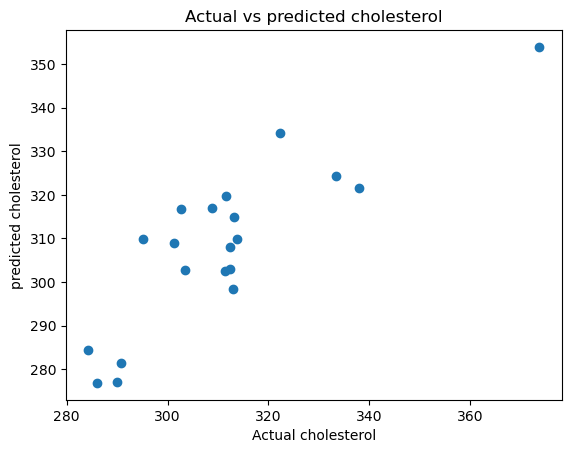

In [37]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, prediction)
plt.xlabel("Actual cholesterol")
plt.ylabel("predicted cholesterol")
plt.title("Actual vs predicted cholesterol")
plt.show()

In [45]:
import joblib
joblib.dump(model, "Cholesterol_model.joblib")

['Cholesterol_model.joblib']

In [41]:
print(X.columns)

Index(['const', 'ID', 'Age (years)', 'Blood Pressure (mmHg)',
       'Smoking (Yes=1, No=0)'],
      dtype='object')


In [ ]:
print